# PROJECT

### NAME : RAMANAND K

## Business Case: Walmart - Confidence Interval and CLT

## Business Problem
#### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


## Problem Statements

- Which gender spend more money on purchase
- Find amount spend per transaction from each gender
- Which product is most purchased (product id)
- Which product makes more money (product id)
- Purchase of men and women from each city
- Which age category spend more money and less money for purchase
- Which age category spend highest/lowest amount per purchase
- Which city spend more money on purchase
- Which city amount spend per purchase is maximum/minimum
- What is the total no of people involved for purchase from each city
- Which gender purchase the most/least in each city
- what happens to purchase when stay in city changes
- Marital status has any effect on purchae
- What amount of money spend 90% of people on each purchase
- What amount of money spend 90% of male on each purchase
- What amount of money spend 90% of female on each purchase
- Is there any overlap between purchase amount of 90% of male and female
- What amount of money spend 99% of male on each purchase
- What amount of money spend 99% of female on each purchase
- Is there any overlap between purchase amount of 90% of married and unmarried
- What amount of money spend 90% of people in different age category
- What is the probablity of purchase of different age category in each city


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
#shape of the data
df.shape

(550068, 10)

In [4]:
#Data types of each columns
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
#finding any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [6]:
#unique values of each columns
for i in df.columns:
    print(i,df[i].unique())

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]
Product_Category [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase [ 8370 15200  1422 ...   135   123   613]


In [7]:
for i in df.columns:
    print(i,df[i].value_counts())

User_ID 1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
Product_ID P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
Gender M    414259
F    135809
Name: Gender, dtype: int64
Age 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
Occupation 4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
City_Category B    231173
C 

## checking outlier values using Boxplot

C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation'>

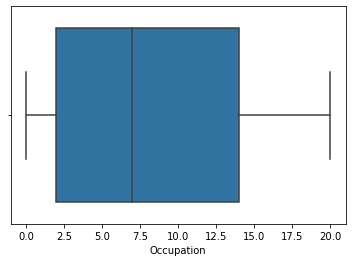

In [8]:
#checking outlier values in occupation
sns.boxplot(df["Occupation"])

C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category'>

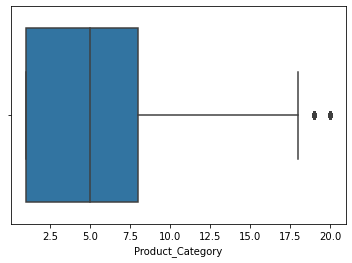

In [9]:
#checkig outlier values in product_category
sns.boxplot(df["Product_Category"])

C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

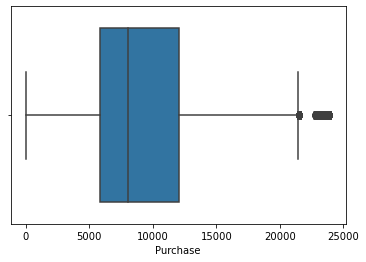

In [10]:
#checking outlier values of purchase
sns.boxplot(df["Purchase"])

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [12]:
#finding median of each column
ds=df[["Occupation","Marital_Status","Product_Category","Purchase"]]
for i in ds.columns:
    print("median of",i,"=",ds[i].median())

median of Occupation = 7.0
median of Marital_Status = 0.0
median of Product_Category = 5.0
median of Purchase = 8047.0


In [13]:
Purchase75=np.percentile(df["Purchase"],75)
Purchase75

12054.0

In [14]:
Purchase25=np.percentile(df["Purchase"],25)
Purchase25

5823.0

In [15]:
Purchase50=np.percentile(df["Purchase"],50)
Purchase50

8047.0

In [16]:
IQR=Purchase75-Purchase25
IQR

6231.0

In [17]:
upper=Purchase75+1.5*IQR
upper

21400.5

In [18]:
lower=Purchase25-1.5*IQR
lower

-3523.5

In [19]:
outlier=df.loc[(df.Purchase>upper)|(df.Purchase<lower)]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [20]:
#Total no of outlier
outlier.shape[0]

2677

In [21]:
#dataset by removing outlier
df_new=df.loc[(df.Purchase<upper)&(df.Purchase>lower)]
df_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Total sum of purchase on the basis of gender

In [22]:
df_new.groupby("Gender")["Purchase"].sum().to_frame().reset_index()

,Gender,Purchase
0,F,1172499251
1,M,3861104315


<AxesSubplot:ylabel='Purchase'>

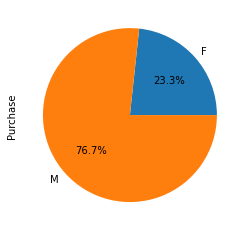

In [23]:
df_new.groupby("Gender")["Purchase"].sum().plot(kind="pie",autopct="%1.1f%%")

#### from the graph and table male involved in purchase is greater than female
#### male contribute 2/3 of total revenue of the purchase

## Amount spent per transaction of male and female

In [24]:
df_new.groupby("Gender")["Purchase"].mean().to_frame()

,Purchase
Gender,
F,8671.049039
M,9367.724355


## Percentage of amount spend per purchase of male and female

<AxesSubplot:ylabel='Purchase'>

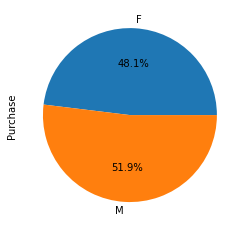

In [25]:
df_new.groupby("Gender")["Purchase"].mean().plot(kind="pie",autopct="%1.1f%%")

#### Money spend per transaction in male is higher than female that means male spend more money than female for the purchase

## Correlation of the data

<AxesSubplot:>

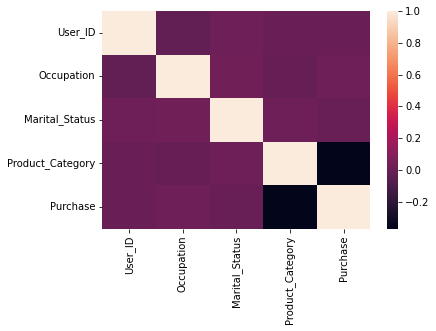

In [26]:
sns.heatmap(df_new.corr())

### Most purchased product

In [27]:
product=df_new.Product_ID.value_counts().to_frame().reset_index()[:10]
product

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


#### Product_ID - P00265242 is the most purchased product

## Which product makes more money

In [28]:
product_sum=df_new.groupby("Product_ID")["Purchase"].sum().to_frame().reset_index()
product_sum.columns=["Product_ID","Total_amount"]
product_sum=product_sum.sort_values("Total_amount",ascending=False)[:10]

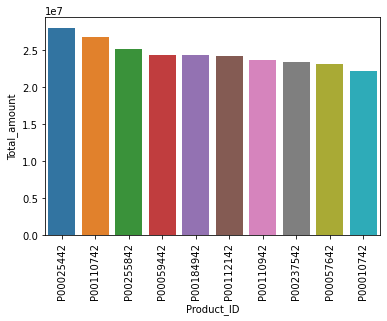

In [29]:
sns.barplot(data=product_sum,x="Product_ID",y="Total_amount")
plt.xticks(rotation=90)
plt.show()

## Men and Women from each city

In [30]:
pd.crosstab(df_new.City_Category,df_new.Gender)

Gender,F,M
City_Category,,
A,35552,111484
B,57572,172542
C,42096,128145


<AxesSubplot:xlabel='City_Category'>

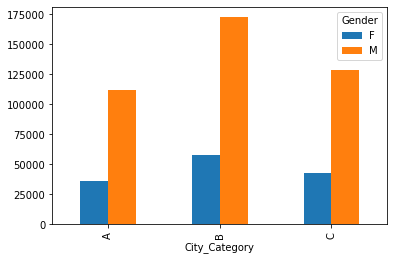

In [31]:
pd.crosstab(df_new.City_Category,df_new.Gender).plot(kind="bar")

#### In every city no of male is very higher than female

## Purchase based on Age

In [32]:
age_purchase=df_new.groupby("Age").aggregate({"Purchase":["sum","count","mean"]}).reset_index()
age_purchase.columns=["Age","sum of purchase","no of purchase","avg"]
age_purchase

,Age,sum of purchase,no of purchase,avg
0,0-17,133295464,15032,8867.447046
1,18-25,906326568,99334,9124.031731
2,26-35,2010253327,218661,9193.469924
3,36-45,1012493010,109409,9254.202214
4,46-50,414839340,45442,9128.985080
5,51-55,359878441,38191,9423.121704
6,55+,196517416,21322,9216.650220


#### Age category 26-35 spend more money for the purchase 
#### Age category 26-35 has more no of purchases
#### Amount spend per purchase is greater in age 51-55 and lesser in age 0-17

<AxesSubplot:xlabel='sum of purchase', ylabel='no of purchase'>

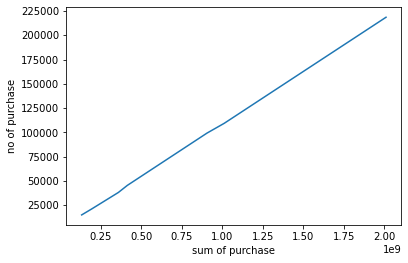

In [33]:
sns.lineplot(data=age_purchase,x="sum of purchase",y="no of purchase")

## Purchase based on city

In [34]:
city_purchase=df_new.groupby("City_Category").aggregate({"Purchase":["sum","mean"]}).reset_index()
city_purchase.columns=["city","Purchase_sum","Purchase per person"]
city_purchase

,city,Purchase_sum,Purchase per person
0,A,1300587440,8845.367393
1,B,2090931484,9086.502707
2,C,1642084642,9645.647300


## City gets more Income

<AxesSubplot:xlabel='city', ylabel='Purchase_sum'>

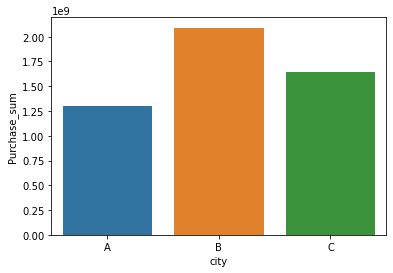

In [35]:
sns.barplot(data=city_purchase,x="city",y="Purchase_sum")

### Amount spend per purchase in city

<AxesSubplot:xlabel='city', ylabel='Purchase per person'>

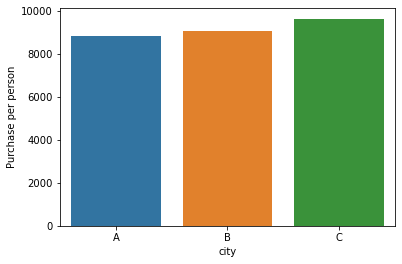

In [36]:
sns.barplot(data=city_purchase,x="city",y="Purchase per person")

#### City B gets more income
#### Amount spend per purchase is greater in city C

## Total no of people involved for purchase from each city

In [37]:
num=df_new.groupby("City_Category")["User_ID"].nunique().to_frame().reset_index()
num.columns=["City","unique person purchased"]
num

,City,unique person purchased
0,A,1045
1,B,1707
2,C,3139


<AxesSubplot:xlabel='City', ylabel='unique person purchased'>

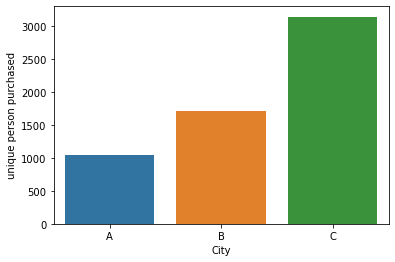

In [38]:
sns.barplot(data=num,x="City",y="unique person purchased")

#### City C has most no of unique  people involved in purchase followed by B and A

## No of product stocked based on city

In [39]:
stock=df_new.groupby("City_Category")["Product_ID"].nunique().to_frame("no_of_product").reset_index()
stock

,City_Category,no_of_product
0,A,3477
1,B,3452
2,C,3392


([<matplotlib.patches.Wedge at 0x1876ec3c2e0>,
 [Text(0.5393337779890761, 0.9587069812617566, 'A'),
  Text(-1.099631843716175, -0.02845713065939211, 'B'),
  Text(0.5639551331803406, -0.9444334850901596, 'C')],
 [Text(0.2941820607213142, 0.5229310806882308, '33.7%'),
  Text(-0.5997991874815499, -0.015522071268759331, '33.4%'),
  Text(0.3076118908256403, -0.5151455373219052, '32.9%')])

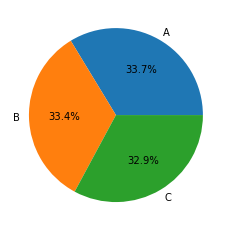

In [40]:
label=["A","B","C"]
plt.pie(data=stock,x="no_of_product",labels=label,autopct="%1.1f%%")

#### No of product stocked   A>B>C

## Purchase in each city based on Gender

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

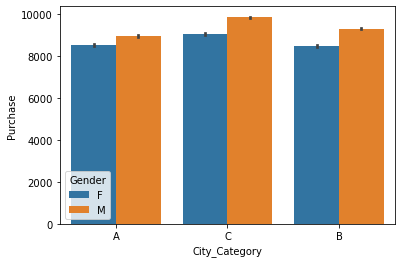

In [41]:
sns.barplot(data=df_new,x="City_Category",y="Purchase",hue="Gender")

#### In each city no of male purchaser greater than no of female purchaser

## Purchase based on stay in the city

In [42]:
purchase_stay=df_new.groupby("Stay_In_Current_City_Years")["Purchase"].count().to_frame().reset_index()
purchase_stay

,Stay_In_Current_City_Years,Purchase
0,0,74036
1,1,192845
2,2,101384
3,3,94804
4,4+,84322


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

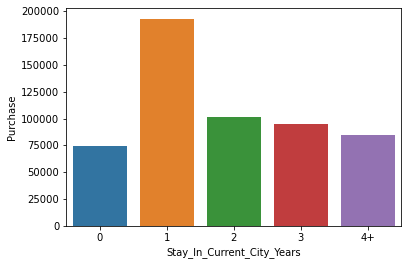

In [43]:
sns.barplot(data=purchase_stay,x="Stay_In_Current_City_Years",y="Purchase")

#### Increase in the stay in city decrease in the no of purchase (except people spend 0 year)

## Marital status and purchase

In [44]:
mar=df_new.groupby("Marital_Status")["Purchase"].sum().to_frame().reset_index()
mar

,Marital_Status,Purchase
0,0,2974337720
1,1,2059265846


([<matplotlib.patches.Wedge at 0x187704f72e0>,
 [Text(-0.33803283108306154, 1.1514051437743236, 'Unmarried'),
  Text(0.3098634284928063, -1.0554547151264633, 'Married')])

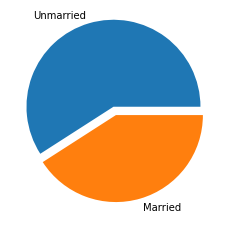

In [45]:
label="Unmarried","Married"
plt.pie(data=mar,x="Purchase",labels=label,explode=(0.1,0))

#### Single persons spends more amount than married

## Product category and purchase

In [46]:
category=df_new.groupby("Product_Category")["User_ID"].nunique().to_frame().reset_index()
category.sort_values("User_ID",ascending=False,inplace=True)
category[:10]

,Product_Category,User_ID
0,1,5767
4,5,5751
7,8,5659
1,2,4296
5,6,4085
2,3,3838
10,11,3583
3,4,3361
15,16,3130
19,20,2550


#### Product category 1 is most unque number purchase

## Total Purchase 90% of cofidence

In [47]:
from scipy import stats
from sklearn.utils import resample

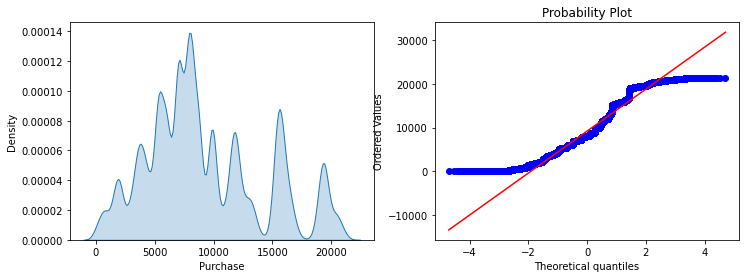

In [48]:
#kdeplot of purchase to check the purchase column in normal distribution
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.kdeplot(df_new["Purchase"],fill=True,ax=ax[0])
stats.probplot(df_new["Purchase"],dist="norm",plot=ax[1])

plt.show()

#from this kde plot purchase not in normal distribution

In [49]:
#from this kdeplot and probplot the purchase column not in normal distribution
#so we have to make this column to normal distribution
# so we will bootstrap the values po purchase column to get normal distribtion curve

In [50]:
#bootstrapping
#resample is a function to take random samples from population ie required column
n_iteration=1000
bootstrap_means=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(df_new["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means.append(m)


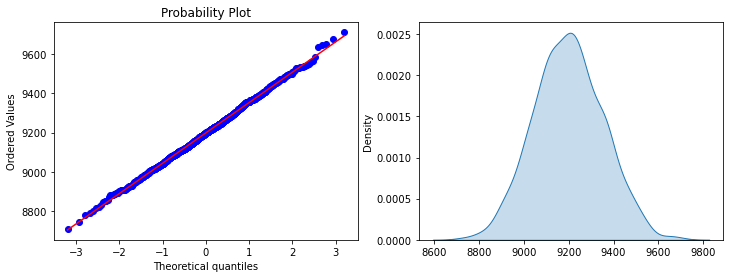

In [51]:
#after bootstrapping checking the values in normal distribution
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
stats.probplot(bootstrap_means,dist="norm",plot=ax[0])
sns.kdeplot(bootstrap_means,fill=True,ax=ax[1])
plt.show()

In [52]:
m=np.mean(bootstrap_means)
m

9198.418999

In [53]:
std=np.std(bootstrap_means)
std

154.3449333538066

In [54]:
confidence=0.90
lower,upper=np.percentile(bootstrap_means,[5,95])
print(lower)
print(upper)

8947.165050000001
9457.3759


- 90% of people spend the amount betweem 9078 and 9308 for the purchase

## Female purchase 90% confidence

In [55]:
Female=df.loc[df.Gender=="F"]

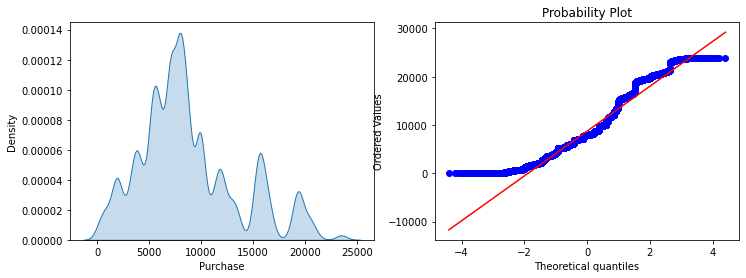

In [56]:
#kdeplot of purchase
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.kdeplot(Female["Purchase"],fill=True,ax=ax[0])
stats.probplot(Female["Purchase"],dist="norm",plot=ax[1])

plt.show()
#from this kde plot purchase not in normal distribution

In [57]:
n_iteration=1000
bootstrap_means_female=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Female["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_female.append(m)


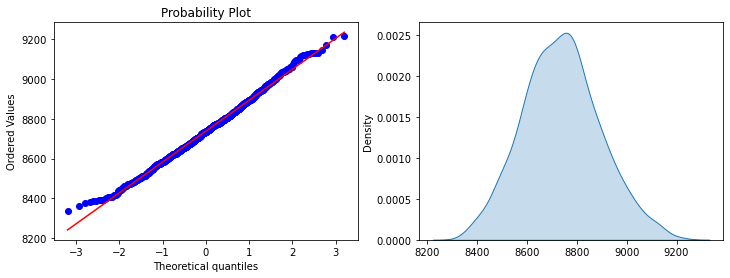

In [58]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
stats.probplot(bootstrap_means_female,dist="norm",plot=ax[0])
sns.kdeplot(bootstrap_means_female,fill=True,ax=ax[1])
plt.show()

In [59]:
m=np.mean(bootstrap_means_female)
m

8737.937482000001

In [60]:
std=np.std(bootstrap_means_female)
std

155.0766538198051

In [61]:
confidence=0.90
lower_female,upper_female=np.percentile(bootstrap_means_female,[5,95])
print(lower_female)
print(upper_female)

8486.5934
9008.49215


- 90% of females spend the amount between 8624 and 8842 for the purchase

# Male purchase with 90% confidence

In [62]:
male=df_new.loc[df.Gender=="M"]

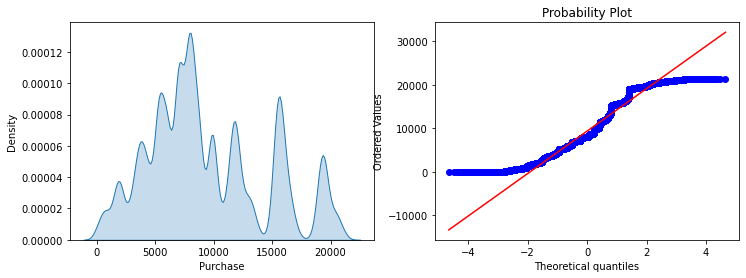

In [63]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.kdeplot(male["Purchase"],fill=True,ax=ax[0])
stats.probplot(male["Purchase"],dist="norm",plot=ax[1])
plt.show()

In [64]:
n_iterations=1000
sample_size=1000
bootstrap_means_male=[]
for i in range(n_iterations):
    s=resample(male["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_male.append(m)
    

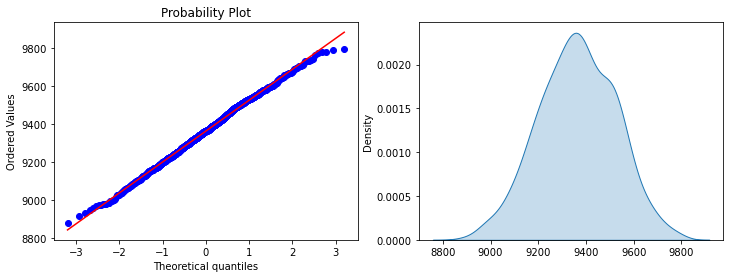

In [65]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
stats.probplot(bootstrap_means_male,plot=ax[0])
sns.kdeplot(bootstrap_means_male,fill=True,ax=ax[1])
plt.show()

In [66]:
mean=np.mean(bootstrap_means_male)
mean

9362.734309999998

In [67]:
std=np.std(bootstrap_means_male)
std

161.98407923286135

In [68]:
confidence=.90
lower_male,upper_male=np.percentile(bootstrap_means_male,[5,95])
print(lower_male)
print(upper_male)

9096.16415
9617.51835


- 90% of male spend the amount between 9252 and 9485 for the purchase

### Kde plot of bootstrap means of married and unmarried

<AxesSubplot:ylabel='Density'>

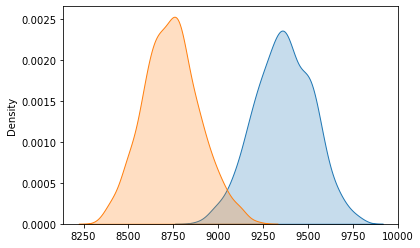

In [69]:
sns.kdeplot(bootstrap_means_male,fill=True)
sns.kdeplot(bootstrap_means_female,fill=True)


### changing the sample size to observe the distribution of the mean

In [70]:
#change the sample size of the male purchase amount from 1000 to 250 to detect the change in mean and standard deviation
n_iterations=1000
sample_size=250
bootstrap_means_smallsample=[]
for i in range(n_iterations):
    s=resample(df_new["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_smallsample.append(m)

In [71]:
mean=np.mean(bootstrap_means)
std=np.std(bootstrap_means)
mean_small=np.mean(bootstrap_means_smallsample)
std_small=np.std(bootstrap_means_smallsample)
print("sample mean",mean)
print("sample standard deviation",std)
print("sample mean of reduced sample size",mean_small)
print("standard deviation of reduced sample size",std_small)

sample mean 9198.418999
sample standard deviation 154.3449333538066
sample mean of reduced sample size 9190.007388
standard deviation of reduced sample size 317.1985014950125


- Sample mean shows a small increase with decrease in sample size
- Standard deviation shows a wide increase with decrease in sample size

### kdeplot with different sample size

<AxesSubplot:ylabel='Density'>

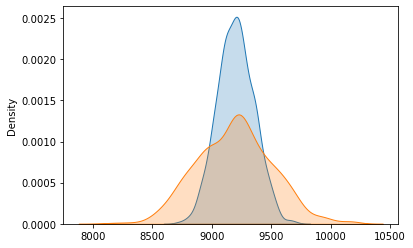

In [72]:
sns.kdeplot(bootstrap_means,fill=True)
sns.kdeplot(bootstrap_means_smallsample,fill=True)

- Decrease in sample size kdeplot shows more wide 

### Checking confidence interval 90 of purchase overlap or not on the basis of gender

In [73]:
  
# creating 1st interval
interval1 = pd.Interval(lower_female, upper_female)
print('first interval is :' + str(interval1))
  
# creating 2nd interval
interval2 = pd.Interval(lower_male, upper_male)
  
# checking whether the intervals overlap
result = interval1.overlaps(interval2)
print('second interval is :'+str(interval2))
str = 'yes' if result else 'no'
  
print('do the intervals overlap ? : '+str)

first interval is :(8486.5934, 9008.49215]
second interval is :(9096.16415, 9617.51835]
do the intervals overlap ? : no


- The amount spend for the purchase of 90% of women and the amount spend for the purchase of 90% of men is does not overlap eachother

## Checking confidence interval 99 of purchase overlap or not on the basis of gender

### Confidence interval 99 of female

In [74]:
#confidence interval 99 of female
confidence=0.99
lower_female,upper_female=np.percentile(bootstrap_means_female,[0.5,99.5])
print(lower_female)
print(upper_female)

8386.73984
9130.549804999999


### Confidence interval 99 of male

In [75]:
#confidence interval 99 of male
confidence=0.99
lower_male,upper_male=np.percentile(bootstrap_means_male,[0.5,99.5])
print(lower_male)
print(upper_male)

8969.12909
9762.01126


### Checking confidence interval 99 of male and female overlap or not

In [76]:
#checking confidence interval overlapping or not
# creating 1st interval
interval1 = pd.Interval(lower_female, upper_female)

  
# creating 2nd interval
interval2 = pd.Interval(lower_male, upper_male)
  
# checking whether the intervals overlap
result = interval1.overlaps(interval2)

str = 'yes' if result else 'no'
  
print('do the intervals overlap ? : '+str)

do the intervals overlap ? : yes


#### 99% of Male and female purchase amount overlap each other

### Checking confidence interval between married and unmarried

### Confidence interval 90% - Married

In [77]:
married=df_new.loc[df_new.Marital_Status==1]


In [78]:
#bootstrapping sample
n_iterations=1000
sample_size=1000
bootstrap_means_married=[]
for i in range(n_iterations):
    s=resample(married["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_married.append(m)
    

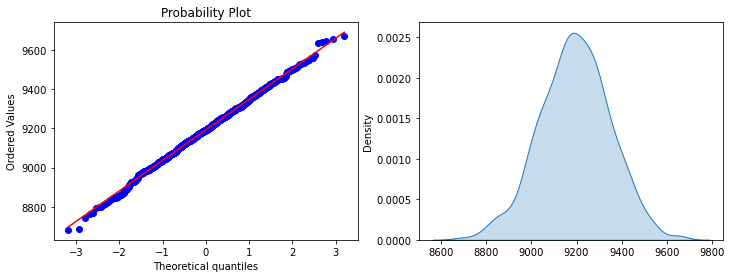

In [79]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
#probplot to check bootstrap means are in noramal distribution
stats.probplot(bootstrap_means_married,plot=ax[0])
#kdeplot of normal distribution of bootstrap sample
sns.kdeplot(bootstrap_means_married,fill=True,ax=ax[1])
plt.show()

In [80]:
#finding confidence intervel
confidence=.90
lower_married,upper_married=np.percentile(bootstrap_means_married,[5,95])
print(lower_married)
print(upper_married)

8932.52945
9447.0516


### Confidence interval 90% - Unmarried

In [81]:
unmarried=df_new.loc[df_new.Marital_Status==0]

In [82]:
n_iterations=1000
sample_size=1000
bootstrap_means_unmarried=[]
for i in range(n_iterations):
    s=resample(unmarried["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_unmarried.append(m)
    

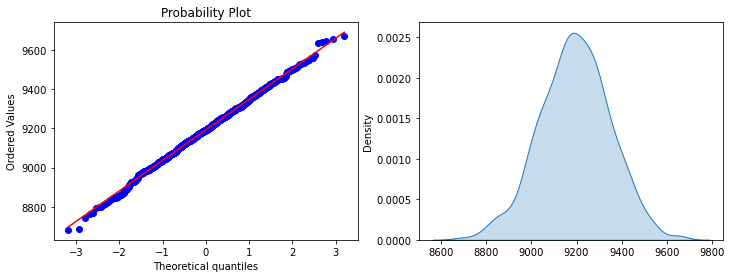

In [83]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
stats.probplot(bootstrap_means_married,plot=ax[0])
sns.kdeplot(bootstrap_means_married,fill=True,ax=ax[1])
plt.show()

In [84]:
confidence=.90
lower_unmarried,upper_unmarried=np.percentile(bootstrap_means_unmarried,[5,95])
print(lower_unmarried)
print(upper_unmarried)

8939.9783
9453.25565


### Overlapping of  confidence interval 90% between married and unmarried

In [85]:
interval1 = pd.Interval(lower_married, upper_married)

  
# creating 2nd interval
interval2 = pd.Interval(lower_unmarried, upper_unmarried)
  
# checking whether the intervals overlap
result = interval1.overlaps(interval2)

str = 'yes' if result else 'no'
  
print('do the intervals overlap ? : '+str)

do the intervals overlap ? : yes


- The amount spend for the purchase of 90% of married and the amount spend for the purchase of 90% of unmarried is overlap eachother

<AxesSubplot:ylabel='Density'>

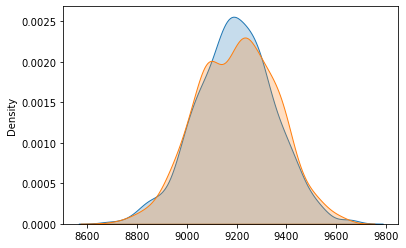

In [86]:
#kdeplot of bootstrapmeans of married and unmarried
sns.kdeplot(bootstrap_means_married,fill=True)
sns.kdeplot(bootstrap_means_unmarried,fill=True)


## Confidence interval 90 - based on the purchase of different age category

### Confidence interval 90 of Purchase - age category 0-17

In [87]:
#confidence interval of age between 0-17

age0_17=df_new.loc[df_new.Age=="0-17"]
n_iterations=1000
sample_size=1000
bootstrap_means_age0_17=[]
for i in range(n_iterations):
    s=resample(age0_17["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age0_17.append(m)

confidence=.90
lower_age0_17,upper_age0_17=np.percentile(bootstrap_means_age0_17,[5,95])
print(lower_age0_17)
print(upper_age0_17)


8606.7307
9151.94845


###  Confidence interval 90 of Purchase - age category 18-25

In [88]:
#Confidence interval of age between 18-25

age18_25=df_new.loc[df_new.Age=="18-25"]
n_iterations=1000
sample_size=1000
bootstrap_means_age18_25=[]
for i in range(n_iterations):
    s=resample(age18_25["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age18_25.append(m)

confidence=.90
lower_age18_25,upper_age18_25=np.percentile(bootstrap_means_age18_25,[5,95])
print(lower_age18_25)
print(upper_age18_25)


8853.6757
9375.2364


###  Confidence interval 90 of Purchase - age category 26-35

In [89]:
#Confidence interval of age between 26-35

age26_35=df_new.loc[df_new.Age=="26-35"]
n_iterations=1000
sample_size=1000
bootstrap_means_age26_35=[]
for i in range(n_iterations):
    s=resample(age26_35["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age26_35.append(m)

confidence=.90
lower_age26_35,upper_age26_35=np.percentile(bootstrap_means_age26_35,[5,95])
print(lower_age26_35)
print(upper_age26_35)

8945.66865
9447.0205


###  Confidence interval 90 of Purchase - age category 36-45

In [90]:
#Confidence interval of age between 36-45

age36_45=df_new.loc[df_new.Age=="36-45"]
n_iterations=1000
sample_size=1000
bootstrap_means_age36_45=[]
for i in range(n_iterations):
    s=resample(age36_45["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age36_45.append(m)

confidence=.90
lower_age36_45,upper_age36_45=np.percentile(bootstrap_means_age36_45,[5,95])
print(lower_age36_45)
print(upper_age36_45)

8994.60375
9513.2172


###  Confidence interval 90 of Purchase - age category 46-50

In [91]:
#Confidence interval of age between 46-50

age46_50=df_new.loc[df_new.Age=="46-50"]
n_iterations=1000
sample_size=1000
bootstrap_means_age46_50=[]
for i in range(n_iterations):
    s=resample(age46_50["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age46_50.append(m)

confidence=.90
lower_age46_50,upper_age46_50=np.percentile(bootstrap_means_age46_50,[5,95])
print(lower_age46_50)
print(upper_age46_50)

8888.795600000001
9385.40445


###  Confidence interval 90 of Purchase - age category 51-55

In [92]:
#confidence interval of age between 51-55

age51_55=df_new.loc[df_new.Age=="51-55"]
n_iterations=1000
sample_size=1000
bootstrap_means_age51_55=[]
for i in range(n_iterations):
    s=resample(age51_55["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age51_55.append(m)

confidence=.90
lower_age51_55,upper_age51_55=np.percentile(bootstrap_means_age51_55,[5,95])
print(lower_age51_55)
print(upper_age51_55)

9170.80215
9687.56855


###  Confidence interval 90 of Purchase - age category 55+

In [93]:
#confidence interval of age above 55

age55=df_new.loc[df_new.Age=="55+"]
n_iterations=1000
sample_size=1000
bootstrap_means_age55=[]
for i in range(n_iterations):
    s=resample(age55["Purchase"],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_age55.append(m)

confidence=.90
lower_age55,upper_age55=np.percentile(bootstrap_means_age55,[5,95])
print(lower_age55)
print(upper_age55)

8965.9922
9481.66805


### Kde plot of bootstrap means of different age category

<AxesSubplot:ylabel='Density'>

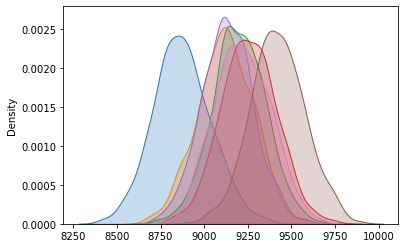

In [94]:
sns.kdeplot(bootstrap_means_age0_17,fill=True)
sns.kdeplot(bootstrap_means_age18_25,fill=True)
sns.kdeplot(bootstrap_means_age26_35,fill=True)
sns.kdeplot(bootstrap_means_age36_45,fill=True)
sns.kdeplot(bootstrap_means_age46_50,fill=True)
sns.kdeplot(bootstrap_means_age51_55,fill=True)
sns.kdeplot(bootstrap_means_age55,fill=True)

#### Bootstrap means of every age category overlapping each other means there is a common interval between everyone purchase

### Conditional probability of purchase based on age category from city A,B,C

In [95]:
#probability
city=pd.crosstab(df_new.City_Category,df_new.Age,margins=True).reset_index()
city["P(age 0-17|each city)"]=(city["0-17"]/city["All"]*100).round(2)
city["P(age 18-25|each city)"]=(city["18-25"]/city["All"]*100).round(2)
city["P(age 26-35|each city)"]=(city["26-35"]/city["All"]*100).round(2)
city["P(age 36-45|each city)"]=(city["36-45"]/city["All"]*100).round(2)
city["P(age 46-50|each city)"]=(city["46-50"]/city["All"]*100).round(2)
city["P(age 51-55|each city)"]=(city["51-55"]/city["All"]*100).round(2)
city["P(age 55+|each city)"]=(city["55+"]/city["All"]*100).round(2)
city

Age,City_Category,0-17,18-25,26-35,36-45,46-50,51-55,55+,All,P(age 0-17|each city),P(age 18-25|each city),P(age 26-35|each city),P(age 36-45|each city),P(age 46-50|each city),P(age 51-55|each city),P(age 55+|each city)
0,A,2525,27448,73403,26485,7572,6055,3548,147036,1.72,18.67,49.92,18.01,5.15,4.12,2.41
1,B,5403,43104,91223,47365,20299,17605,5115,230114,2.35,18.73,39.64,20.58,8.82,7.65,2.22
2,C,7104,28782,54035,35559,17571,14531,12659,170241,4.17,16.91,31.74,20.89,10.32,8.54,7.44
3,All,15032,99334,218661,109409,45442,38191,21322,547391,2.75,18.15,39.95,19.99,8.30,6.98,3.90


#### In each city age category 36-45 has higher probability to purchase
#### Age category 0-17 and 55+ has lower probability to purchase

## Recommendations

- Male purchase more than female so stock product focus to men
- Amount spend per transaction of male is greater than female means male customers more expensive than female
- In every city male purchaser very much greater than female
- Age between 26-35 and 36-45 purchase more items than other age categories
- Amount spend per purchase is greater in the age category 51-55 and lesser in 0-17
- City B makes more no of purchases and City B gets more income
- Amount spend per purchase is greater in city C means people in city C purchase more expensive product so shop in city C can chose more expensive product compare to other cities
- City A stocks more product but city makes lesser income is also city A. So dont randomly chose product to stock
- Increase in the stay in city decrease in the no of purchase (except people spend 0 year) so concentrate more and give incentives to new people in the city
- Unmarried person spend more money than married so focus on items that are more popular among unmarried
- confidence interval 99 of male is 8900-9800 and female is 8300-9100 so stock product range for male and female accordingly
- Confidence interval of married and unmarried is almost equal means they purchae product same price range
- Product category 1 is most unique no of persons purchase so concentrate more these type of products
- In each city age category 36-45 has higher probability to purchase
- Age category 0-17 and 55+ has lower probability to purchase

In [96]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.
